## PHYS-85200 - Machine Learning for Physicists
### Student: Gehan Ranepura
### Worksheet #1

#### 1\. Form the following 2-D array, without typing it in explicitly: (hint: use .reshape)

array<br>
       ([[ 1,  3,  5], <br>
       [ 7,  9, 11], <br>
       [13, 15, 17], <br>
       [19, 21, 23], <br>
       [25, 27, 29]]) 

In [364]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def odd(n):
    return np.array(range(1, n, 2))

A = odd(30).reshape(5,3)
A

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17],
       [19, 21, 23],
       [25, 27, 29]])

#### 2\. Form a new array that contains the first two rows and columns of the one above.

In [365]:
B = A[:2,:2]
B

array([[1, 3],
       [7, 9]])

#### 3\. Create a numpy array of length = 26 that contains the 26 letters of the alphabet, without typing. Hint: you can obtain a string with all the letters by using string, the text manipulation module... but I'll let you Google how :) 

In [366]:
# https://docs.python.org/3/library/string.html
import string
alphabet = np.array(list(string.ascii_uppercase))
print(len(alphabet))
alphabet

26


array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='<U1')

#### 4\. Create an array containing 26 random numbers between 0 and 1, filter out those that are > 0.5, and return the set of letters from the array in question 3 corresponding to those indices (in other words, apply the same mask to the array above. Bonus points if you can do it with a one liner).

In [382]:
C = np.random.rand(26)
print(C)

mask = (0.5 < C) 
indices = np.where(mask)

D = alphabet[indices]
print(D)

[0.10182941 0.06823641 0.28097    0.17534587 0.1565116  0.12985997
 0.90337463 0.36152427 0.96216129 0.56060113 0.93596026 0.2428235
 0.62276684 0.97114864 0.01816345 0.20313038 0.75844199 0.70834339
 0.25324605 0.34399072 0.65812741 0.05771722 0.98647382 0.13635637
 0.09268105 0.19260504]
['G' 'I' 'J' 'K' 'M' 'N' 'Q' 'R' 'U' 'W']


#### 5\. The code below (from [here](http://scipy-lectures.org/intro/matplotlib/auto_examples/plot_scatter.html#sphx-glr-intro-matplotlib-auto-examples-plot-scatter-py)) shows an example plot. Add a comment after every line of code to explain what it does.

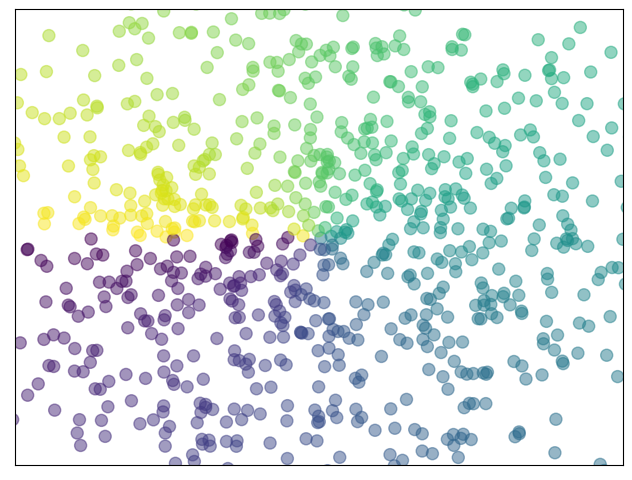

In [368]:
import numpy as np             
import matplotlib.pyplot as plt
# Import the libraries/modules 

n = 1024
# Set a variable n
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
# X and Y are arrays of random n samples from the normal distribution with mean = 0 and standard deviation = 1
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
T = np.arctan2(Y, X)
# Find the element wise arctangent of Y/X
# https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html

plt.axes([0.025, 0.025, 0.95, 0.95])
# Sets the x-y coordinate of the lower-left panel, and the width/height of the axes as a fraction of the figure
plt.scatter(X, Y, s=75, c=T, alpha=.5)
# Plots X vs Y, with marker size 75, colormap T and transparency 0.5]
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

plt.xlim(-1.5, 1.5)
plt.xticks([])
plt.ylim(-1.5, 1.5)
plt.yticks([]);
# plot the lowest/highest x-axis/y-axis limit
# plot tick markers in the x-axis/yaxis ---> in this case there are none

#### 6\. Read into a numpy array the data set "HIP_star_alldata.dat". This data set contains information, collected by the Hipparcos satellite, about properties of stars; we are only interested in columns "Vmag" (magnitude in visual band), 'Plx' (parallax angle, which is inversely proportional to a star's distance), and "B-V" (gradient of brightness in B band compared to V band, often referred to as "color"), so make sure you only read those. Hint: open the file with a text editor first, to see if/how many lines you need to skip.

More information about the data set is available here:

http://astrostatistics.psu.edu/datasets/HIP_star.html


In [369]:
#with open("HIP_star_alldata.dat", "r") as f:
    #print(f.read())
# [1]=Vmag, [4]=Plx, [8]=B-V
    
data = np.loadtxt("HIP_star_alldata.dat", usecols=(1,4,8), skiprows=1, dtype='float')
star = np.array(data)
star

array([[ 9.27 , 21.9  ,  0.999],
       [ 8.65 , 23.84 ,  0.778],
       [10.78 , 24.45 ,  1.15 ],
       ...,
       [ 8.16 , 22.91 ,  0.652],
       [ 7.72 , 22.19 ,  0.563],
       [11.85 , 24.63 ,  1.391]])

#### 7\. Calculate the shape of your array.

In [370]:
star.shape

(2678, 3)

#### 8\. Define a function, logL, that calculates the (log of) a star's luminosity starting from Vmag (the visual brightness) and Plx. The function should implement the following relationship:

LogL = (15 - Vmag - 5 * log10(Plx))/2.5


In [383]:
def logL(Vmag, Plx):
    y = (15 - Vmag - 5*np.log10(Plx)) /2.5
    return y

#### 9\. Make sure your function is vectorized (feed it a vector as argument and check that it runs).




In [384]:
Vmag = star[:,0]
Plx  = star[:,1]
BV   = star[:,2]
LL   = logL(Vmag, Plx)
print(LL)

[-0.38888823 -0.2146125  -1.08855773 ...  0.01594982  0.2196854
 -1.52292882]


#### 10\. Make a scatter plot that has B-V for the stars on the x axis (make sure you index your array correctly!), and their log luminosity (calculated using the function you just made) on the y axis. This is called a H-R diagram (Hertzsprung-Russell diagram). It encodes information about the temperature of stars (expressed by color, or B-V) and their luminosity. 

Add axes titles: B-V for the x axis, Log L (as appropriate) for y axis.

Adjust axes limits to be [-0.5,3] for B-V, [-3, 4] for log L.



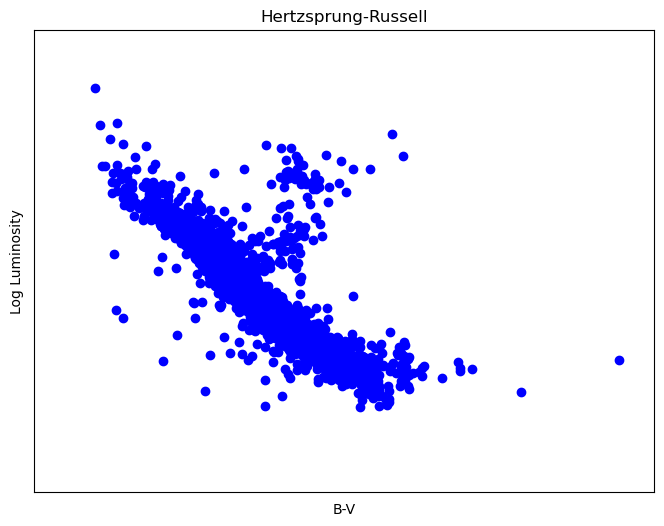

In [385]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(BV,LL, c = 'blue')
plt.title('Hertzsprung-Russell')
plt.xlabel('B-V')
plt.ylabel('Log Luminosity')
plt.xlim(-0.5, 3)
plt.xticks([])
plt.ylim(-3, 4)
plt.yticks([]);

#### 11\. Add information to the above plot using colors and sizes. Re-make the above scatter plot with colors arranged according to Vmag, and another scatter plot where the size of the markers is proportional to the Vmag of each point.




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Vmag min = 0.45, Vmag max = 0.45, Vmag mean = 8.214779686333085


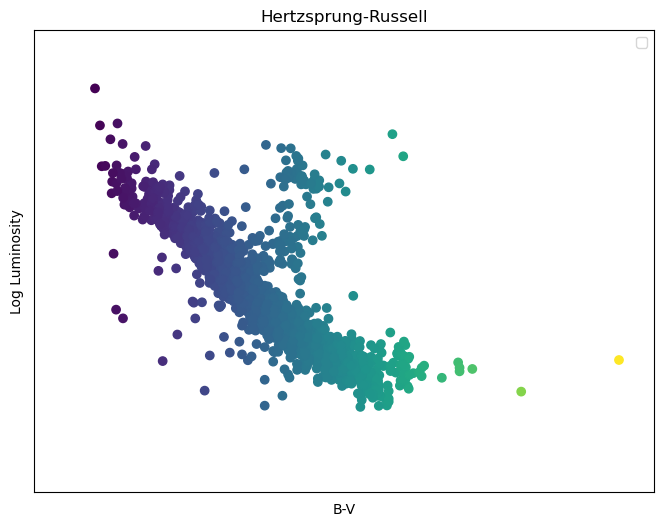

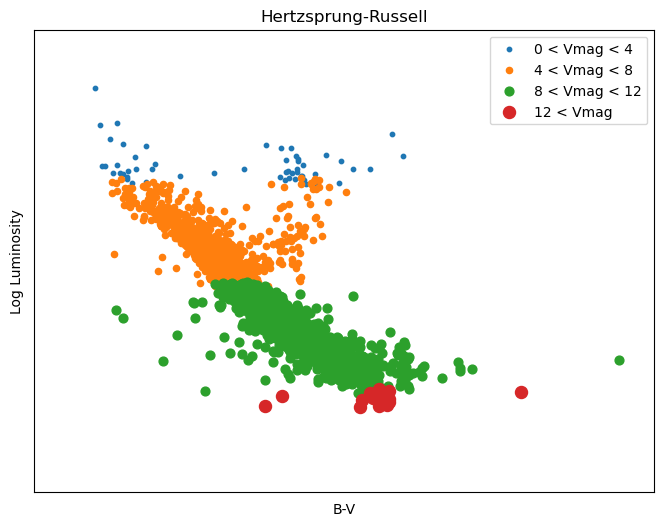

In [394]:
# Find min, max and median of Vmag
print("Vmag min = {}, Vmag max = {}, Vmag mean = {}".format(Vmag.min(), Vmag.min(), Vmag.mean()) )

# Create masks for Vmag
mask1 = (0  < Vmag)  * (Vmag <  4)
mask2 = (4  < Vmag)  * (Vmag <  8)
mask3 = (8  < Vmag)  * (Vmag < 12)
mask4 = (12 < Vmag)

# Create arrays for BV and LL with indices associated for the Vmag masks
BV1 = BV[np.where(mask1)]
BV2 = BV[np.where(mask2)]
BV3 = BV[np.where(mask3)]
BV4 = BV[np.where(mask4)]

LL1 = LL[np.where(mask1)]
LL2 = LL[np.where(mask2)]
LL3 = LL[np.where(mask3)]
LL4 = LL[np.where(mask4)]

# Plot Figure with Vmag points binned by colors
plt.figure(figsize=(8,6))
#plt.scatter(BV1,LL1, color = 'blue'  , label = '0 < Vmag < 4')
#plt.scatter(BV2,LL2, color = 'red'   , label = '4 < Vmag < 8' )
#plt.scatter(BV3,LL3, color = 'green' , label = '8 < Vmag < 12')
#plt.scatter(BV4,LL4, color = 'black' , label = '12 < Vmag')
plt.scatter(BV,LL, c=BV)
plt.title('Hertzsprung-Russell')
plt.xlabel('B-V')
plt.ylabel('Log Luminosity')
plt.xlim(-0.5, 3)
plt.xticks([])
plt.ylim(-3, 4)
plt.yticks([]);
plt.legend()

# Plot Figure with Vmag points binned by size(and color)
plt.figure(figsize=(8,6))
plt.scatter(BV1,LL1, s=10 ,  label = '0 < Vmag < 4')
plt.scatter(BV2,LL2, s=20 ,  label = '4 < Vmag < 8' )
plt.scatter(BV3,LL3, s=40 ,  label = '8 < Vmag < 12')
plt.scatter(BV4,LL4, s=75 ,  label = '12 < Vmag')
#plt.scatter(BV,LL, s=BV)
plt.title('Hertzsprung-Russell')
plt.xlabel('B-V')
plt.ylabel('Log Luminosity')
plt.xlim(-0.5, 3)
plt.xticks([])
plt.ylim(-3, 4)
plt.yticks([]);
plt.legend()

#### 12\. Visualize B-V as a histogram.




Text(0, 0.5, 'Count')

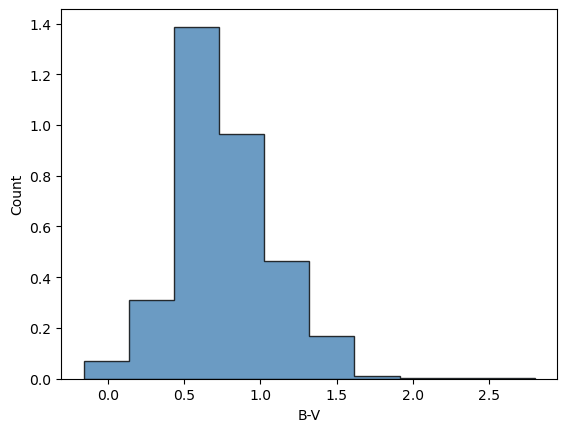

In [387]:
plt.hist(BV, bins=10, density=True, alpha=0.8,
  histtype='stepfilled', color='steelblue', edgecolor='k');
plt.xlabel('B-V')
plt.ylabel('Count')

#### 13\. For the B-V array, calculate its mean, median, and its standard deviation.

In [388]:
print("BV mean = {}, BV median = {}, BV Stdv = {}".format( BV.mean(), np.median(BV), BV.std()) )

BV mean = 0.7615298730395818, BV median = 0.7104999999999999, BV Stdv = 0.31812819990080615


#### 14\. Calculate the 10 and 90 percentile levels of the B-V array, and explain what they are. 


In [389]:
print("10th percentile of BV : ",
       np.percentile(BV, 10))
print("90th percentile of BV : ",
       np.percentile(BV, 90))

10th percentile of BV :  0.41639999999999994
90th percentile of BV :  1.2


#### 15\. Are the mean and the median different? In either case, what does this tell us about the distribution?


They are slightly different, which indicates that the distribution is skewed to have more points towards a side greater or lesser than the median.